In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [2]:
apl_df = pd.read_csv("datasets\premier_league_season-1415.csv")
apl_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/14,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,6,2,13,19,9,3,2,2,0,1
1,16/08/14,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,3,16,10,3,6,1,1,0,0
2,16/08/14,Man United,Swansea,1,2,A,0,1,A,M Dean,...,5,4,14,20,4,0,2,4,0,0
3,16/08/14,QPR,Hull,0,1,A,0,0,D,C Pawson,...,6,4,10,10,8,9,1,2,0,0
4,16/08/14,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,2,14,9,2,8,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,...,6,1,12,15,8,1,2,2,0,1
376,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,...,7,2,7,6,5,6,0,0,0,0
377,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,...,6,4,13,8,8,4,1,1,0,0
378,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,...,4,1,9,9,2,3,2,1,0,0


In [ ]:
teams_df = pd.DataFrame(apl_df["HomeTeam"].unique(), columns=["Team"]).sort_values(by="Team").reset_index()
teams_df["Wins"] = apl_df[apl_df["FTR"] == "A"].groupby("AwayTeam")["FTR"].value_counts().sort_index().values + apl_df[apl_df["FTR"] == "H"].groupby("HomeTeam")["FTR"].value_counts().sort_index().values
teams_df["Draws"] = apl_df[apl_df["FTR"] == "D"].groupby("AwayTeam")["FTR"].value_counts().sort_index().values + apl_df[apl_df["FTR"] == "D"].groupby("HomeTeam")["FTR"].value_counts().sort_index().values
teams_df["Losses"] = 38 - teams_df["Wins"] - teams_df["Draws"]
teams_df["Points"] = teams_df["Wins"] * 3 + teams_df["Draws"]
teams_df["Home Goals"] = apl_df.groupby("HomeTeam")["FTHG"].sum().sort_index().values
teams_df["Away Goals"] = apl_df.groupby("AwayTeam")["FTAG"].sum().sort_index().values
teams_df["Total Goals"] = teams_df["Home Goals"] + teams_df["Away Goals"]
teams_df["Conceded"] = apl_df.groupby("HomeTeam")["FTAG"].sum().sort_index().values + apl_df.groupby("AwayTeam")["FTHG"].sum().sort_index().values
teams_df = teams_df[["Team", "Points", "Wins", "Draws", "Losses", "Total Goals", "Home Goals", "Away Goals", "Conceded"]].sort_values(by="Points", ascending=False)


In [4]:
teams_df

,Team,Points,Wins,Draws,Losses,Total Goals,Home Goals,Away Goals,Conceded
3,Chelsea,87,26,9,3,73,36,37,32
9,Man City,79,24,7,7,83,44,39,38
0,Arsenal,75,22,9,7,71,41,30,36
10,Man United,70,20,10,8,62,41,21,37
17,Tottenham,64,19,7,12,58,31,27,53
8,Liverpool,62,18,8,12,52,30,22,48
13,Southampton,60,18,6,14,54,37,17,33
16,Swansea,56,16,8,14,46,27,19,49
14,Stoke,54,15,9,14,48,32,16,45
4,Crystal Palace,48,13,9,16,47,21,26,51


In [5]:
teams_df.describe()

,Points,Wins,Draws,Losses,Total Goals,Home Goals,Away Goals,Conceded
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,52.35000,14.350000,9.300000,14.350000,48.750000,28.000000,20.750000,48.750000
std,16.34907,5.769931,2.494204,5.163383,14.767942,8.565537,7.538498,10.083206
min,30.00000,7.000000,6.000000,3.000000,28.000000,14.000000,13.000000,32.000000
25%,38.75000,10.000000,8.000000,12.000000,39.500000,22.500000,14.750000,43.250000
50%,47.50000,12.500000,9.000000,14.500000,46.500000,27.000000,19.000000,50.500000
75%,62.50000,18.250000,11.000000,19.000000,55.000000,33.000000,23.000000,53.000000
max,87.00000,26.000000,17.000000,24.000000,83.000000,44.000000,39.000000,73.000000


# Матрица корелляции

<Axes: >

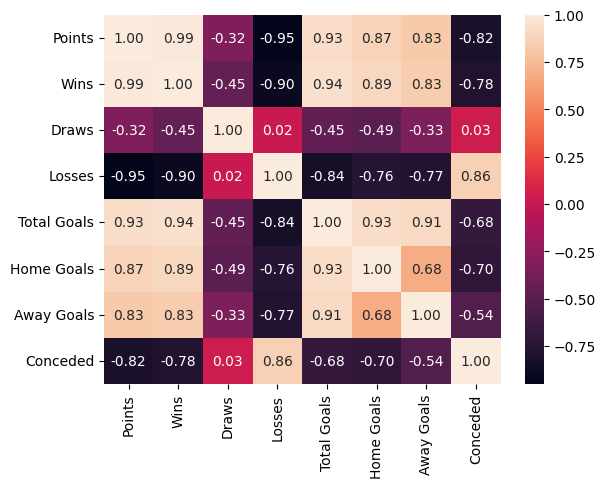

In [6]:
sns.heatmap(teams_df.corr(), annot=True, fmt=".2f")

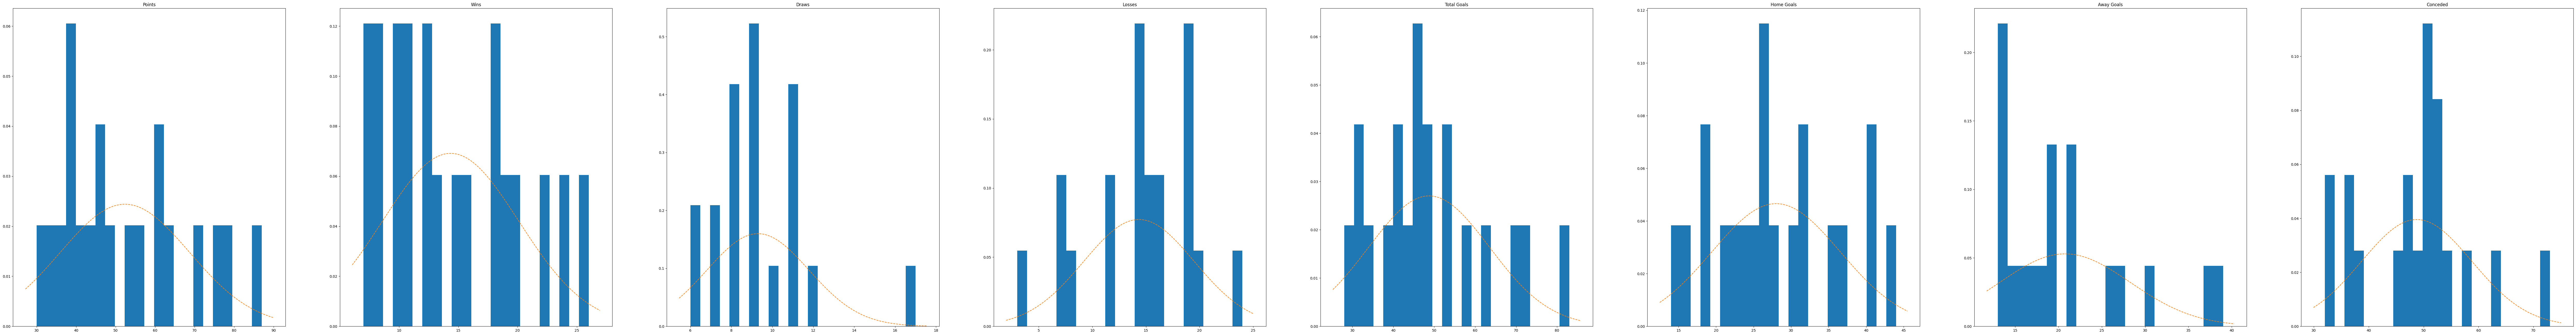

In [7]:
keys = ["Points", "Wins", "Draws", "Losses", "Total Goals", "Home Goals", "Away Goals", "Conceded"]

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(16 * len(keys), 16)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(teams_df[key], density=True, bins=23)
    
    loc = teams_df[key].mean()
    scale = teams_df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

# Боксплоты


In [8]:
num_columns = [column for column in teams_df.columns if column != "Team"]

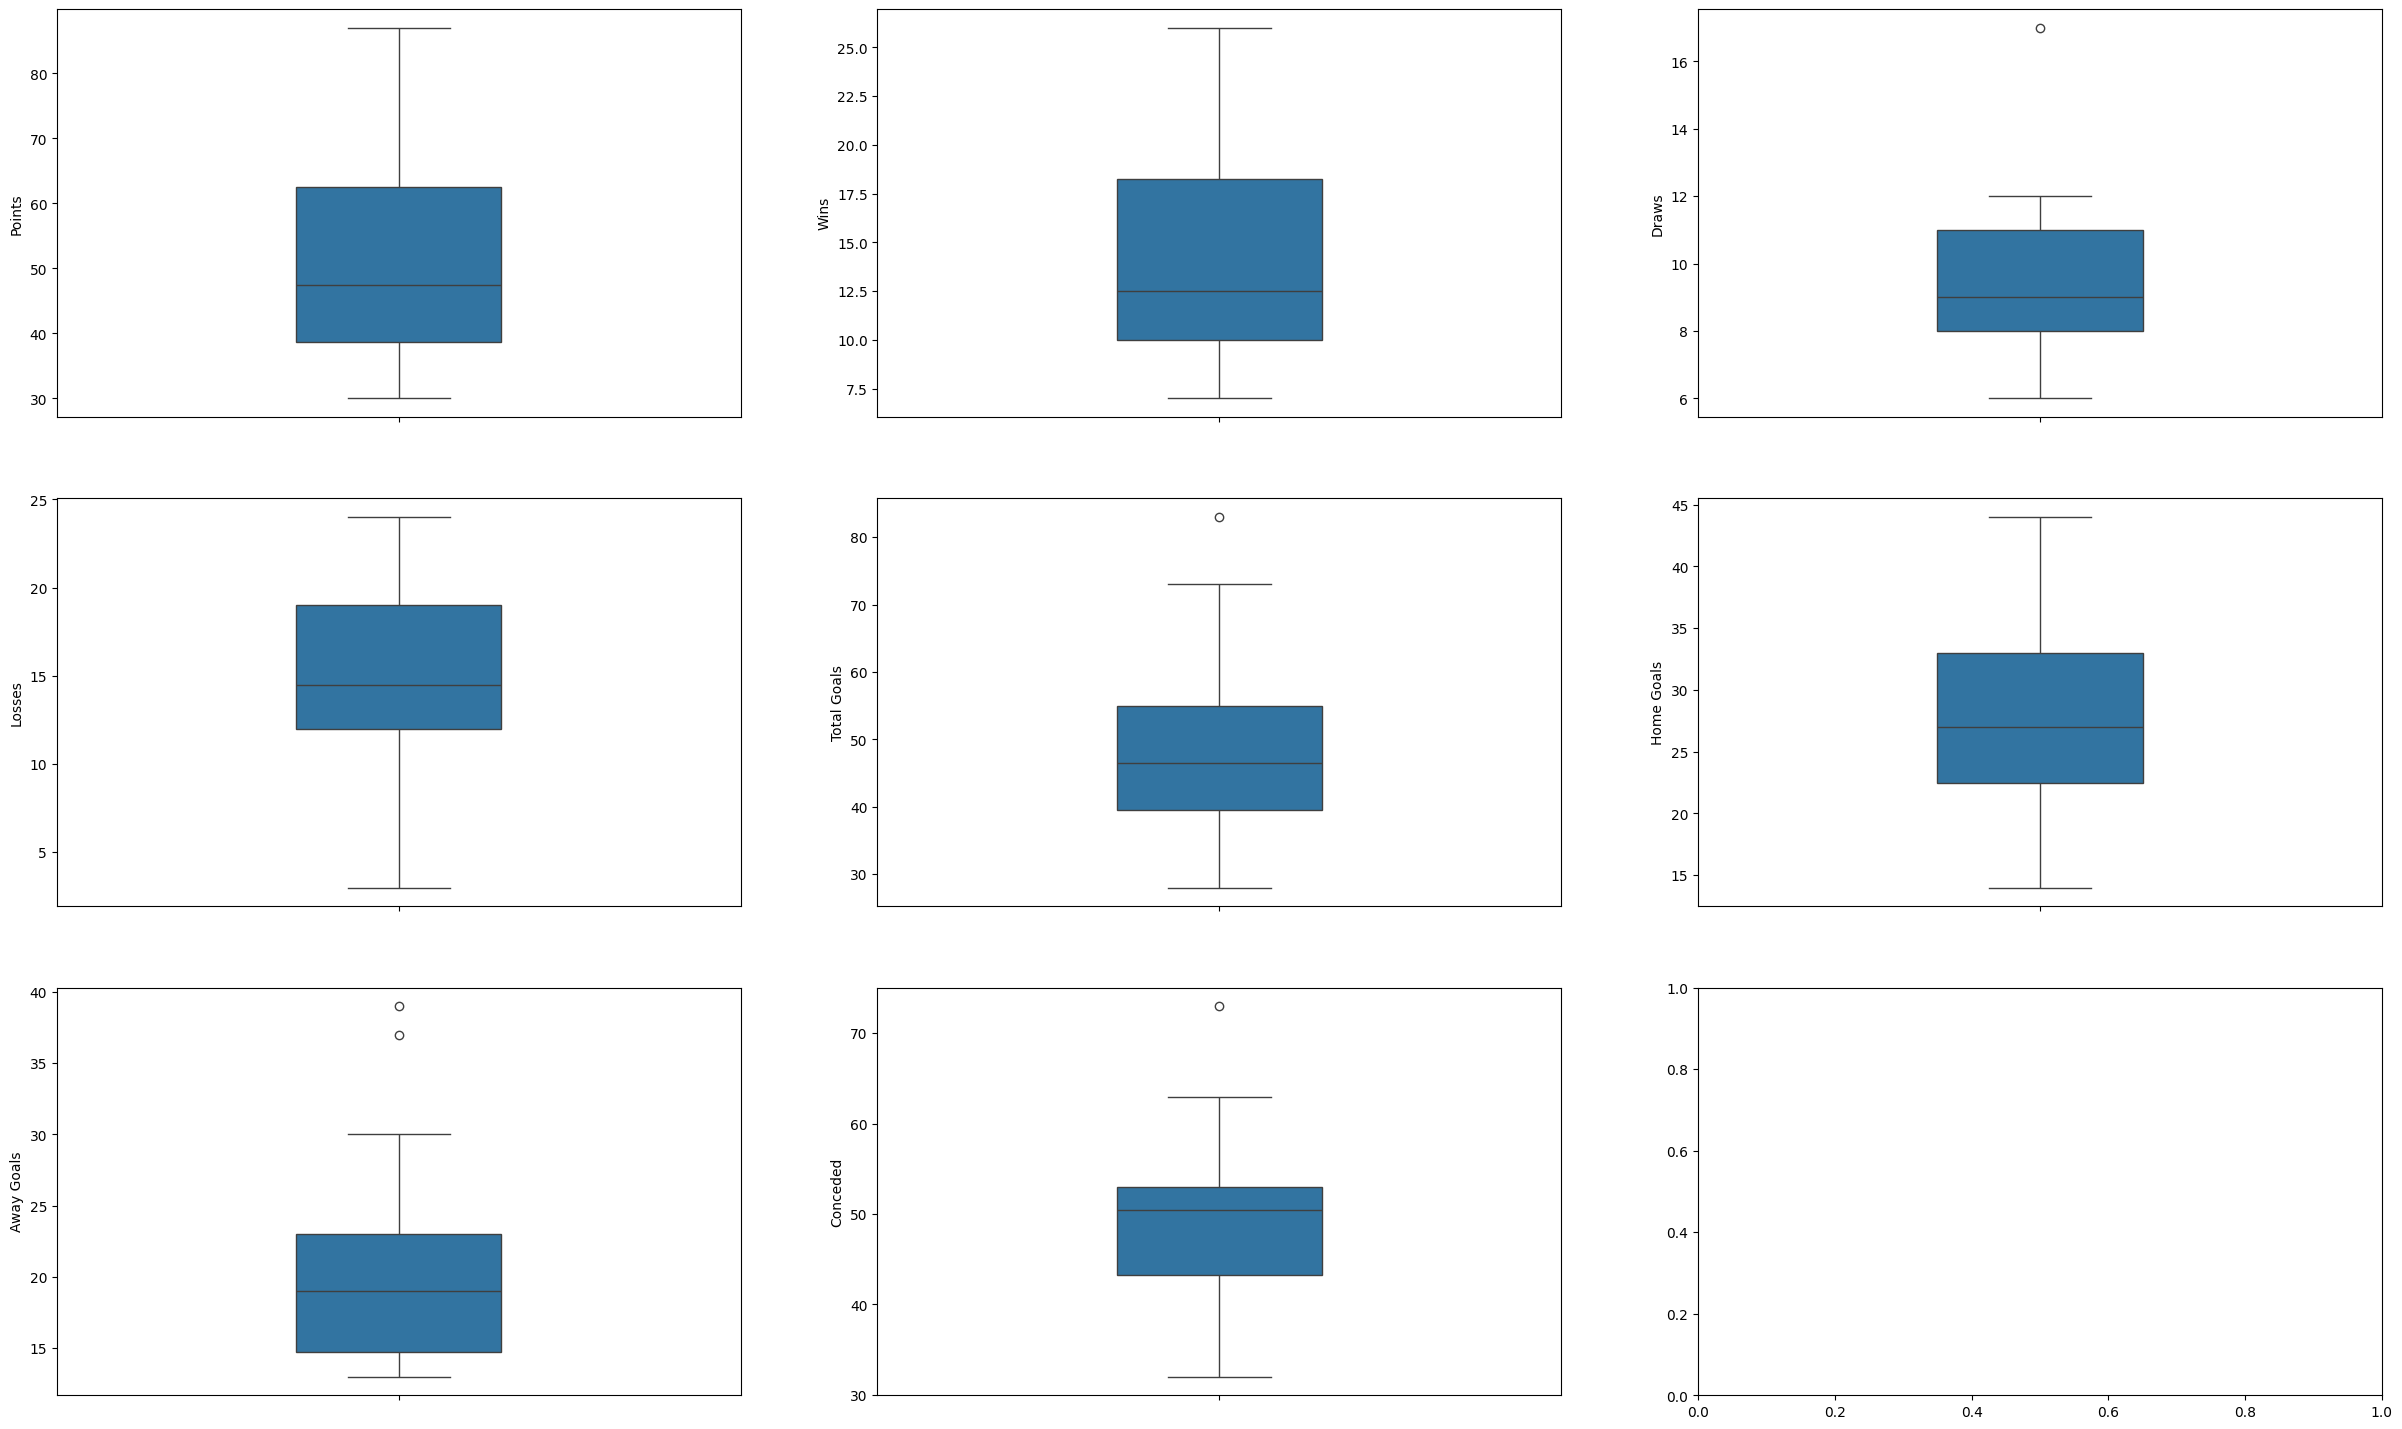

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(30, 18))

for i, column in enumerate(teams_df[num_columns].columns):
    sns.boxplot(teams_df[column], ax = axes[i // 3][i % 3], width=0.3)

# Q-Q кривая

График соответствия между теоретическим значением квантиля на выборке и его реальным значением. 

P.S. я выбрал две минимально кореллирующие колонки

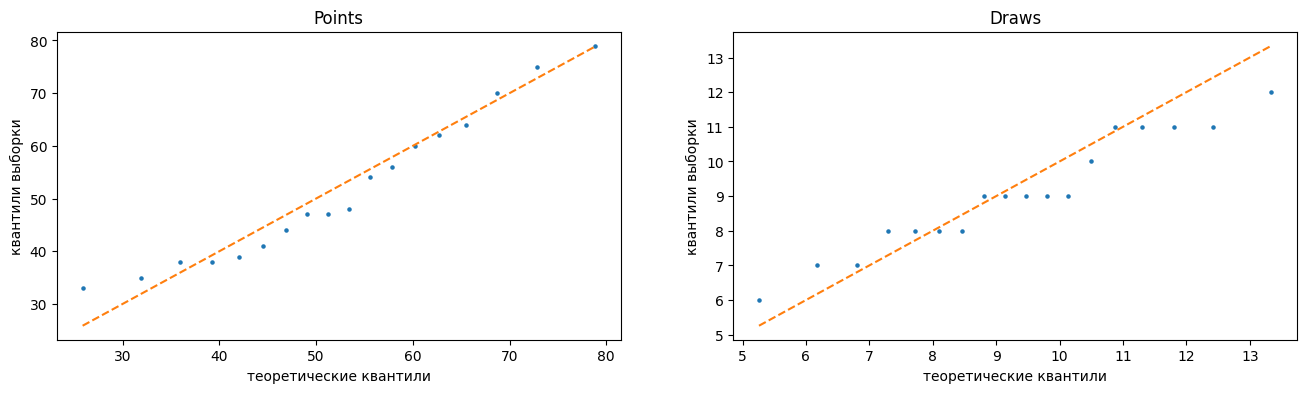

In [10]:
keys = ["Points", "Draws"]
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = teams_df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

# Проверка на нормальное распределение


Оценим нормальность выборок также  на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

In [11]:
keys = ["Points", "Draws"]

for key in keys:
    samples = teams_df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.65
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.95
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.95
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.95



# Регрессия между голами и победами


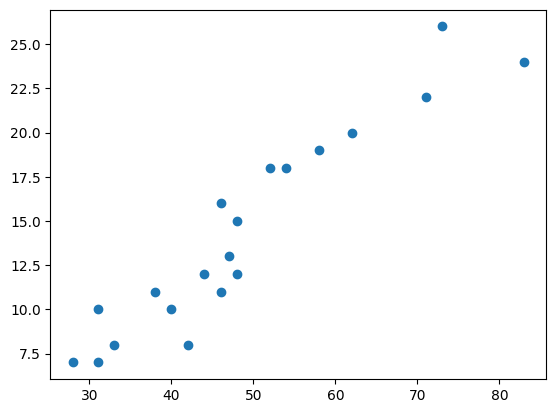

In [14]:
plt.scatter(teams_df["Total Goals"], teams_df["Wins"])
plt.show()

In [28]:
ones = np.ones((20,1))
x_pot = np.hstack((ones, teams_df['Total Goals'].values.reshape(20,1)))

In [ ]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(teams_df['Wins'])
z = x_pot.dot(b)
e = teams_df['Wins'] - z

In [30]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [31]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(teams_df['Wins']))
R

0.8916297163448051

Как видно из коэффициента детерминации две величины довольно сильно зависимы

# Подтвердим существование зависимости статистическим тестом
Посотроим статистический тест с нулевой гипотезой о том, что зависимости между двумя величинами нет


In [ ]:
n = 20
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 18)

In [33]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.413873419170567

In [34]:
F = (R / k1) / ((1 - R) / k2)
F

148.09719374059375

Так как результат расчёта $F > t$, то зависимость есть.

# Визуализация зависимости

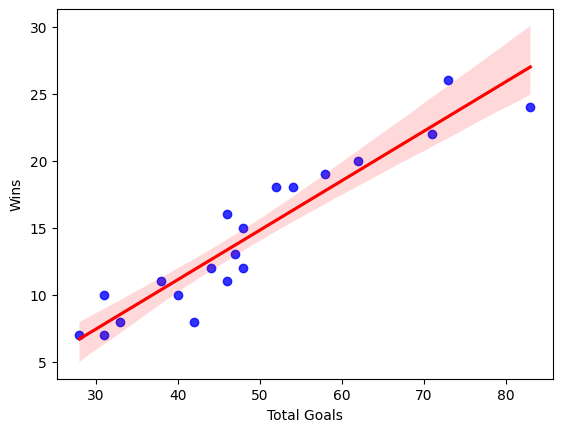

In [74]:
sns.regplot(x='Total Goals', y='Wins', data=teams_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

# Распределено ли общее кол-во голов в разных половинах таблицы по-разному?

In [81]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [79]:
df1 = teams_df[teams_df["Points"] >= teams_df["Points"].median()]
df2 = teams_df[teams_df["Points"] < teams_df["Points"].median()]

In [89]:
var_analise(teams_df, df1, df2, 'Total Goals')

True

In [98]:
res1_mean = df1["Total Goals"].mean()
res2_mean = df2["Total Goals"].mean()
print(f'First half of table: {res1_mean}, second half: {res2_mean}')

First half of table: 59.4, second half: 38.1


# Какие голы сильнее влияют на количество очков? Домашние или Гостевые?

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

X = teams_df[['Home Goals', 'Away Goals']]
y = teams_df['Points']

X_with_const = np.column_stack((np.ones(X.shape[0]), X))

# beta = (X^T * X)^(-1) * X^T * y
beta = np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T @ y

print("Коэффициенты:", beta)

coefficients = beta[1:]
strongest_influence = np.argmax(np.abs(coefficients))
variable_names = X.columns.tolist()
print(f"Переменная с сильнейшим влиянием на очки: {variable_names[strongest_influence]}")

Коэффициенты: [1.9129313  1.08647509 0.96461523]
Переменная с сильным влиянием на z: Home Goals
